In [464]:
# importing libraries and methods
!pip install mord
!pip install lightgbm

import random
import numpy as np 
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from mord import LogisticIT
import matplotlib.pyplot as plt
from dmba.metric import AIC_score
from sklearn import preprocessing
from dmba import regressionSummary
import statsmodels.formula.api as sm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


In [465]:
# reading data and storing it in a pandas dataframe
churn_data=pd.read_csv('churn_data.csv')

In [466]:
# checking data dimensions
churn_data.shape

(28382, 21)

In [467]:
# checking the data type of all columns
churn_data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [468]:
# manually exploring data
churn_data.sample(40)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
20343,21706,2465,31,Male,0.0,self_employed,388.0,2,170,233.0,...,7571.45,7573.20,8002.54,0.51,0.51,0.51,0.51,7411.93,7571.45,0
27720,29592,527,24,Female,0.0,self_employed,492.0,2,1414,NaN,...,1694.24,1764.90,1637.23,0.70,0.70,0.70,143.56,1694.24,1763.36,0
9899,10566,3596,45,Male,0.0,self_employed,1020.0,3,538,25.0,...,1198.07,2336.26,4882.41,1900.70,1725.70,1933.14,2870.21,1764.69,2285.56,0
11724,12522,6082,41,Male,2.0,self_employed,996.0,3,1307,0.0,...,2604.01,3545.25,2461.53,4047.53,1661.18,600.29,2137.79,3376.61,3062.75,0
2161,2314,4728,42,Male,1.0,salaried,1644.0,2,210,73.0,...,1693.62,1859.47,1325.76,0.46,0.46,73.80,71.89,1695.68,1718.46,0
8091,8621,1867,31,Male,0.0,salaried,623.0,2,365,28.0,...,2845.00,2894.52,3033.62,13.56,0.70,248.44,336.82,2794.13,2877.38,0
26671,28480,761,64,Male,NaN,self_employed,315.0,3,2510,85.0,...,2872.08,6378.86,1317.70,0.21,0.21,0.21,11285.93,2872.08,8858.26,1
2805,2990,2155,90,NaN,0.0,self_employed,1029.0,2,1719,54.0,...,2315.76,1509.58,231.65,0.50,2083.12,0.50,0.50,2315.76,1979.85,1
9029,9633,1147,24,Male,0.0,self_employed,334.0,3,1237,222.0,...,1470.36,1606.91,2224.15,0.47,0.47,1000.47,115.67,1435.88,1470.36,1
3097,3302,3099,38,Female,0.0,self_employed,1032.0,3,381,19.0,...,9115.77,7865.90,4791.26,67.91,7857.69,0.54,26286.26,9162.23,7456.78,1


In [469]:
# counting the number of missing values in the data
churn_data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0.5, 0, 'customer_id'),
  Text(1.5, 0, 'vintage'),
  Text(2.5, 0, 'age'),
  Text(3.5, 0, 'gender'),
  Text(4.5, 0, 'dependents'),
  Text(5.5, 0, 'occupation'),
  Text(6.5, 0, 'city'),
  Text(7.5, 0, 'customer_nw_category'),
  Text(8.5, 0, 'branch_code'),
  Text(9.5, 0, 'days_since_last_transaction'),
  Text(10.5, 0, 'current_balance'),
  Text(11.5, 0, 'previous_month_end_balance'),
  Text(12.5, 0, 'average_monthly_balance_prevQ'),
  Text(13.5, 0, 'average_monthly_balance_prevQ2'),
  Text(14.5, 0, 'current_month_credit'),
  Text(15.5, 0, 'previous_month_credit'),
  Text(16.5, 0, 'current_month_debit'),
  Text(17.5, 0, 'previous_month_debit'),
  Text(18.5, 0, 'current_month_balance'),
  Text(19.5, 0, 'previous_month_balance'),
  Text(20.5, 0, 'churn')])

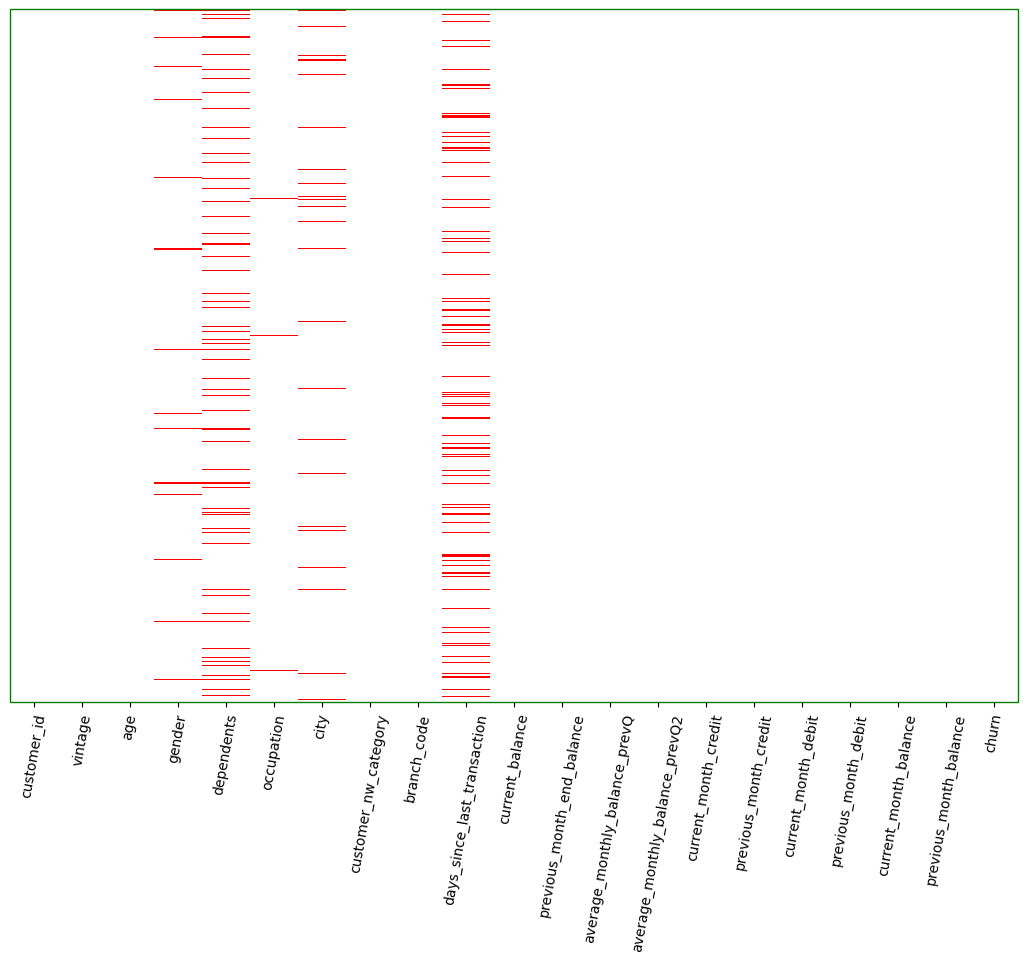

In [470]:
# creating a missing values heatmap using seaborn and numpy libraries
naInfo = np.zeros(churn_data.shape)
naInfo[churn_data.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=churn_data.columns)
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "red"], cbar=False, ax=ax)
ax.set_yticks([])
# draw frame around figure
rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1,
edgecolor='green', facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)
plt.xticks(rotation=80)

<Axes: >

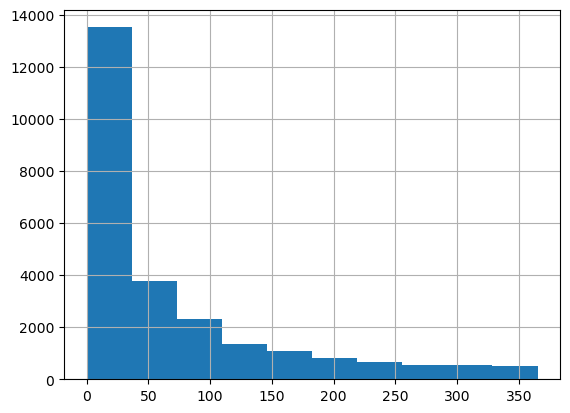

In [471]:
# histogram to see distribution of days_since_last_transaction variable
churn_data['days_since_last_transaction'].hist()

<Axes: >

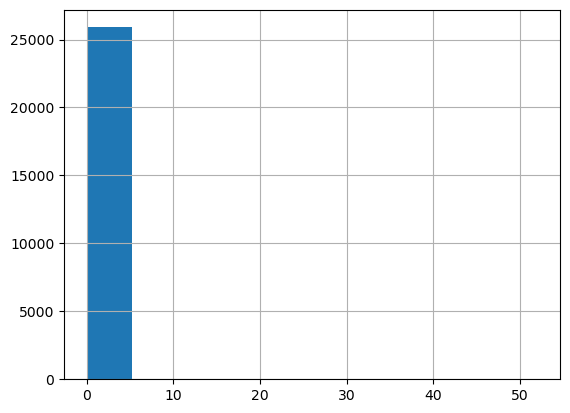

In [472]:
# histogram to see distribution of dependents variable
churn_data['dependents'].hist()

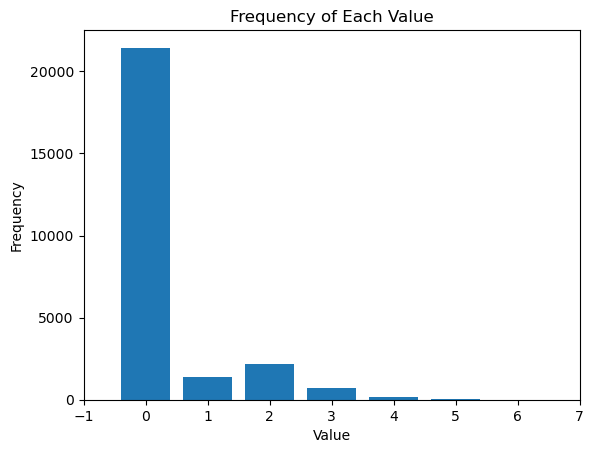

In [473]:
# rescaling histogram to better analyse distribution of dependents variable
value_counts = churn_data['dependents'].value_counts()
value_counts = value_counts.sort_index()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Each Value')
plt.xlim(-1,7)
plt.show()

In [474]:
# checking for unique values in dependents variable
dep=churn_data['dependents'].unique().tolist()
df = pd.DataFrame(dep)
df

,0
0,0.0
1,NaN
2,2.0
3,3.0
4,1.0
5,7.0
6,4.0
7,6.0
8,5.0
9,9.0


In [475]:
# checking for mean, standard deviation and more in different variables
churn_data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [476]:
# checking for outliers in previous_month_credit column
prev=churn_data[churn_data['previous_month_credit']>=500000]
prev=prev['previous_month_credit'].unique().tolist()
sorted(prev)

[500214.54,
 512924.02,
 546463.84,
 555100.44,
 566428.7,
 630389.61,
 713571.69,
 819764.11,
 825646.74,
 825969.46,
 865714.43,
 1413436.47,
 1447086.21,
 1971436.45,
 2361808.29]

In [477]:
# checking for outliers in age column
ag=churn_data[churn_data['age']>=80]
ag=ag['age'].unique().tolist()
sorted(ag)

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]

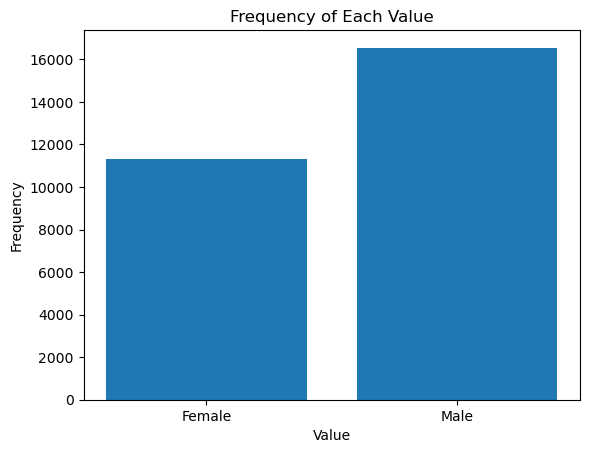

In [478]:
# checking the male to female ratio in the data
value_counts = churn_data['gender'].value_counts()
value_counts = value_counts.sort_index()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Each Value')
plt.show()

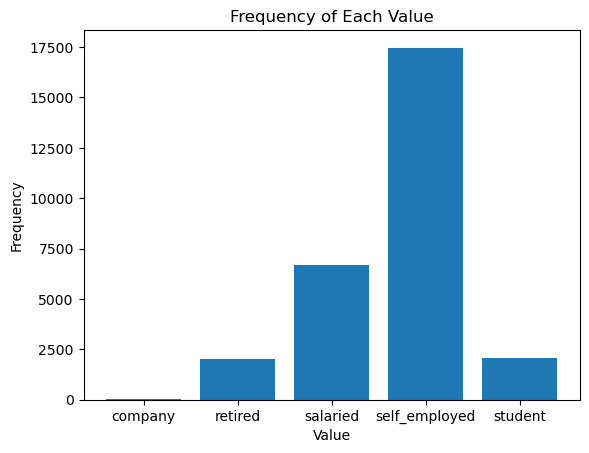

In [479]:
# checking the total counts for different values in occupation variable
value_counts = churn_data['occupation'].value_counts()
value_counts = value_counts.sort_index()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Each Value')
plt.show()

In [480]:
# checking to see if branch_code variable can be used to impute missing city values
filtered_df = churn_data[churn_data['branch_code'] ==1892]
filtered_df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
3811,4063,1705,27,Male,0.0,salaried,NaN,2,1892,45.0,...,9649.36,9059.49,8826.39,0.30,1136.01,0.30,0.30,9649.36,9343.14,0
5796,6177,1383,33,Female,0.0,self_employed,1318.0,2,1892,259.0,...,7160.78,7160.78,7124.24,0.54,0.54,0.54,0.54,7160.78,7160.78,0
8911,9507,1993,43,Female,0.0,self_employed,1318.0,3,1892,32.0,...,227.54,3381.64,535.09,0.04,550.04,0.04,7321.47,206.54,2833.07,1
10648,11374,1678,54,Female,0.0,self_employed,NaN,3,1892,206.0,...,2312.03,2342.68,2922.93,0.67,0.67,0.67,0.67,2273.96,2342.74,0
11731,12529,2068,43,Male,2.0,self_employed,NaN,3,1892,88.0,...,2141.74,2194.55,1740.97,0.10,0.10,218.01,341.67,1952.83,2190.67,0


In [481]:
# imputing nan values of numpy library to all missing data
churn_data=churn_data.fillna(value=np.nan)

In [482]:
# imputing 0 for missing values in dependents column 
churn_data['dependents']=churn_data['dependents'].fillna(value=0)

In [483]:
# replacing outliers in dependents column with 0
for index, row in churn_data.iterrows():
    if row['dependents'] >9:
        churn_data.at[index, 'dependents'] = 0

In [484]:
# checking final values in dependents column
dep=churn_data['dependents'].unique().tolist()
df = pd.DataFrame(dep)
df

,0
0,0.0
1,2.0
2,3.0
3,1.0
4,7.0
5,4.0
6,6.0
7,5.0
8,9.0
9,8.0


In [485]:
# strong the mode for days_since_last_transaction variable
days_mode = churn_data['days_since_last_transaction'].mode()

In [486]:
# replacing missing values in days_since_last_transaction column with the column mode
churn_data['days_since_last_transaction'] =churn_data['days_since_last_transaction'].fillna(value=int(days_mode))

C:\Users\shiva\AppData\Local\Temp\ipykernel_20344\3378608047.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  churn_data['days_since_last_transaction'] =churn_data['days_since_last_transaction'].fillna(value=int(days_mode))


In [487]:
# checking number of males and females in the data
churn_data['gender'].value_counts()

gender
Male      16548
Female    11309
Name: count, dtype: int64

In [488]:
# creating a list that has the same ratio of males to females as the entire dataset 
genders=["Male","Male","Male","Female","Female"]

In [489]:
# randomly picking values from genders list and imputing missing values in the gender column
for index, row in churn_data.iterrows():
    if pd.isnull(row['gender']):
        churn_data.at[index, 'gender'] = random.choice(genders)

In [490]:
# number of males and females in the dataset after imputation
churn_data['gender'].value_counts()

gender
Male      16860
Female    11522
Name: count, dtype: int64

In [491]:
# checking the count represented by different occupations in the data
churn_data['occupation'].value_counts()

occupation
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: count, dtype: int64

In [492]:
# creating a list representing the distribution of differents occupations in data ignoring 'retired' values 
occupations=["self_employed","self_employed","self_employed","self_employed","self_employed","self_employed","self_employed"
            ,"self_employed","salaried","salaried","salaried","student","retired"]

In [493]:
# randomly picking values from occupations list and imputing missing values for occupation variable
for index, row in churn_data.iterrows():
    if pd.isnull(row['occupation']):
        churn_data.at[index, 'occupation'] = random.choice(occupations)

In [494]:
# checking number of different occupations after imputation
churn_data['occupation'].value_counts()

occupation
self_employed    17529
salaried          6724
student           2060
retired           2029
company             40
Name: count, dtype: int64

In [495]:
# creating a list of unique combinations of city and the most present branch code for specific cities
# with in data to use in imputing missing city values
branch_modes = {}
for index, row in churn_data.iterrows():
    branch_code = row['branch_code']
    city = row['city']
    
    if not pd.isna(city):
        if branch_code not in branch_modes:
            branch_modes[branch_code] = city
        else:
            branch_modes[branch_code] = city if churn_data['city'].value_counts()[city] > churn_data['city'].value_counts()[branch_modes[branch_code]] else branch_modes[branch_code]
for index, row in churn_data.iterrows():
    branch_code = row['branch_code']
    city = row['city']
    
    if pd.isna(city):
        churn_data.at[index, 'city'] = branch_modes.get(branch_code, np.nan)

In [496]:
# dropping customer_id column
churn_data=churn_data.drop('customer_id',axis=1)

In [497]:
# dropping remaining few records with null values
churn_data=churn_data.dropna()

In [498]:
# checking if dataset has any missing values left
churn_data.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

<Axes: >

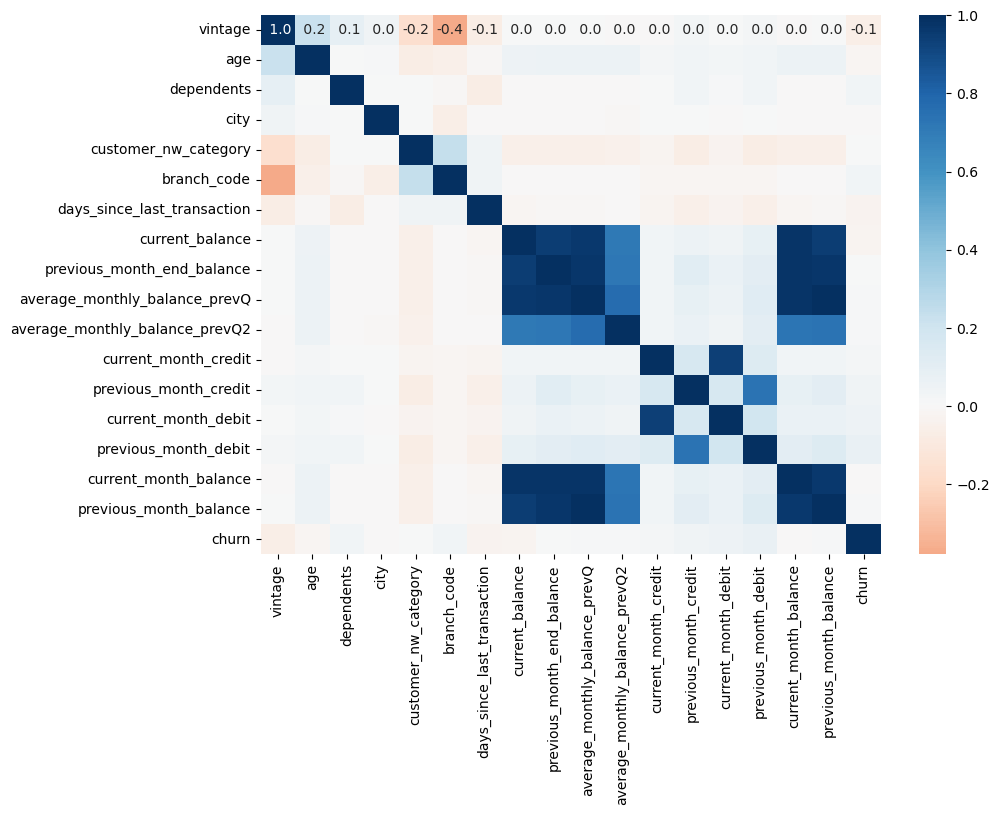

In [499]:
# creating a correlation heatmap using seaborn to find highly correlated columns
corr=churn_data.corr(numeric_only = True)
fig, ax =plt.subplots()
fig.set_size_inches(10,7)
sns.heatmap(corr, annot =True, fmt =" .1f", cmap ="RdBu", center =0, ax=ax)

In [500]:
churn_data.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,310,35,Male,0.0,self_employed,575.0,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,2356,31,Male,0.0,salaried,146.0,2,41,0.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,478,90,Female,0.0,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


<Axes: >

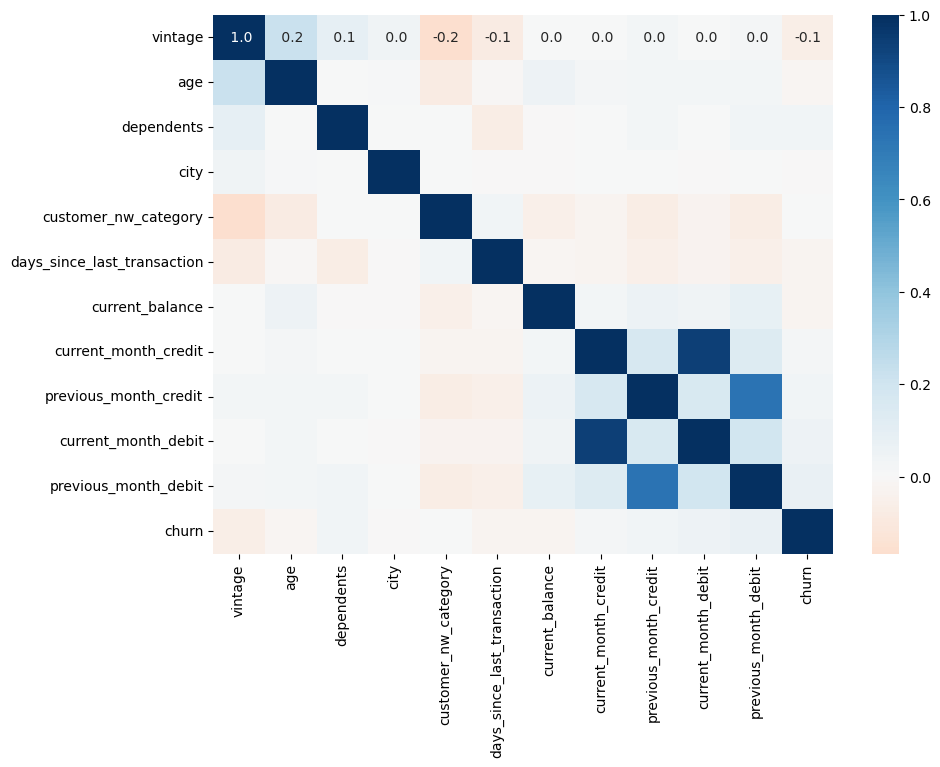

In [501]:
# dropping some columns that were highly correcated to other columns and building another correlations heatmap
churn_data=churn_data.drop('average_monthly_balance_prevQ',axis=1)
churn_data=churn_data.drop('current_month_balance',axis=1)
churn_data=churn_data.drop('previous_month_end_balance',axis=1)
churn_data=churn_data.drop('previous_month_balance',axis=1)
churn_data=churn_data.drop('average_monthly_balance_prevQ2',axis=1)
corr_d= churn_data.drop('churn',axis=1)
corr_d= churn_data.drop('city',axis=1)
corr_d= churn_data.drop('branch_code',axis=1)
corr=corr_d.corr(numeric_only = True)
fig, ax =plt.subplots()
fig.set_size_inches(10,7)
sns.heatmap(corr, annot =True, fmt =" .1f", cmap ="RdBu", center =0, ax=ax)

Text(0.5, 0.98, ' 5 BOXPLOTS ')

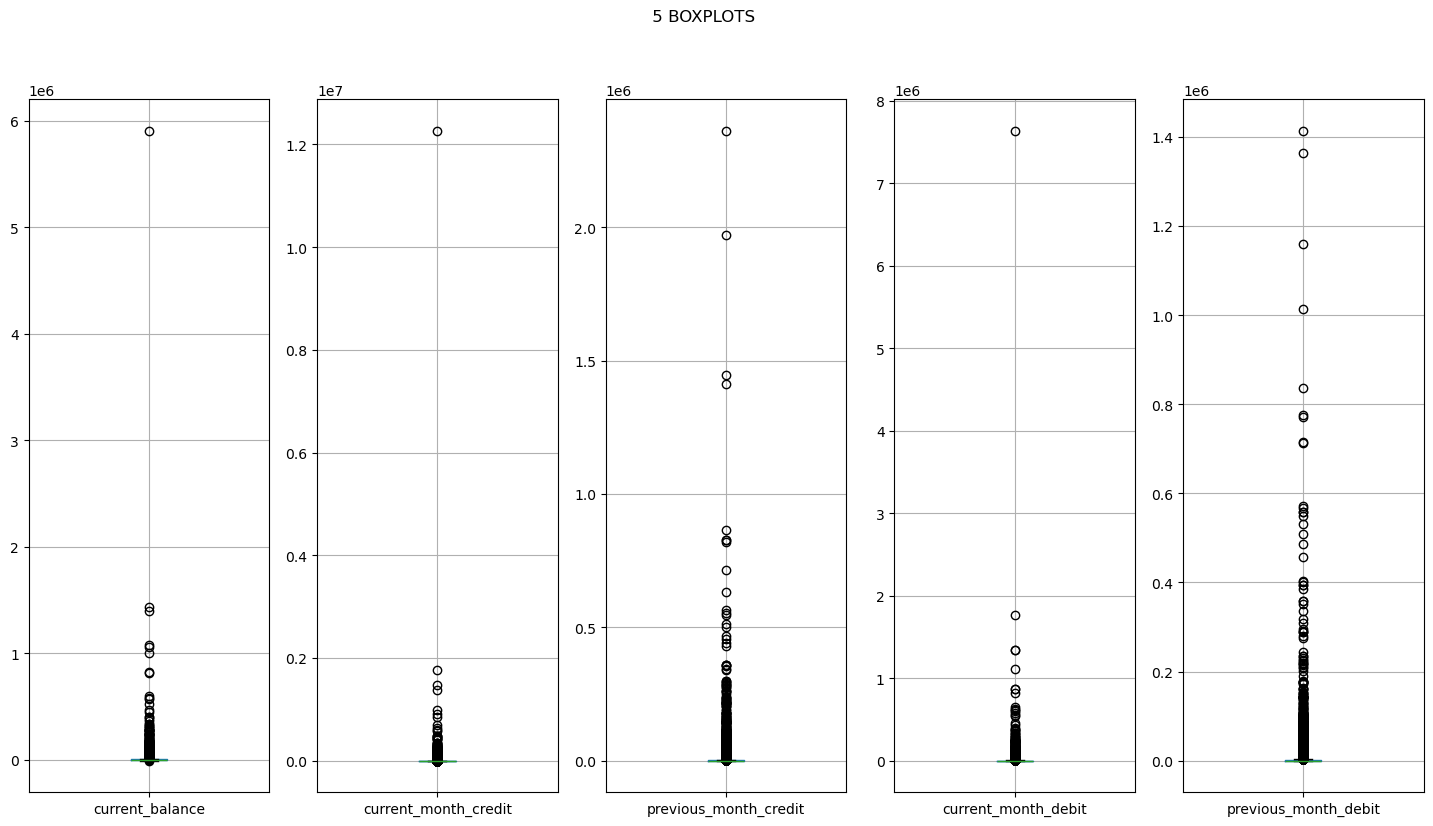

In [502]:
# side by side boxplots to visualise outliers in data
fig, axes =plt.subplots(nrows=1,ncols=5,figsize=(18,9))
churn_data.boxplot(column ='current_balance', ax =axes[0])
churn_data.boxplot(column ='current_month_credit', ax =axes[1])
churn_data.boxplot(column ='previous_month_credit', ax =axes[2])
churn_data.boxplot(column ='current_month_debit', ax =axes[3])
churn_data.boxplot(column ='previous_month_debit', ax =axes[4])
plt.suptitle(' 5 BOXPLOTS ')


<Axes: >

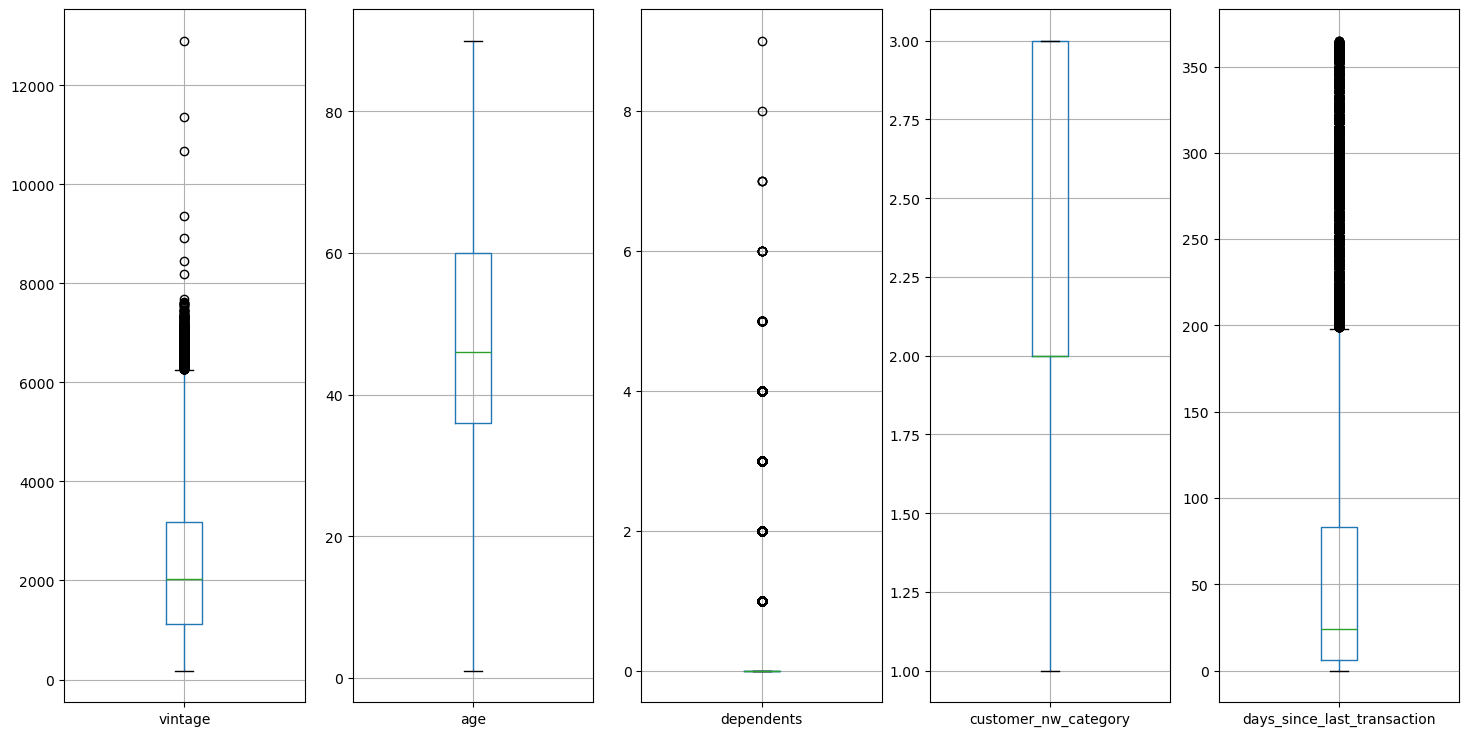

In [503]:
# side by side boxplots
fig, axes =plt.subplots(nrows=1,ncols=5,figsize=(18,9))
churn_data.boxplot(column ='vintage', ax =axes[0])
churn_data.boxplot(column ='age', ax =axes[1])
churn_data.boxplot(column ='dependents', ax =axes[2])
churn_data.boxplot(column ='customer_nw_category', ax =axes[3])
churn_data.boxplot(column ='days_since_last_transaction', ax =axes[4])


In [504]:
# dropping city column
churn_data=churn_data.drop('city',axis=1)

In [505]:
# dropping branch_code column
churn_data=churn_data.drop('branch_code',axis=1)

In [506]:
# creating dummies variables for categorical columns
churn_data = pd.get_dummies(churn_data, drop_first =True)

In [507]:
# creating dummy variables for cutomer_nw_category column
churn_data = pd.get_dummies(churn_data, columns=['customer_nw_category'], drop_first = True)

In [508]:
churn_data.head()

,vintage,age,dependents,days_since_last_transaction,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,churn,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,3135,66,0.0,224.0,1458.71,0.20,0.20,0.20,0.20,0,True,False,False,True,False,True,False
1,310,35,0.0,60.0,5390.37,0.56,0.56,5486.27,100.56,0,True,False,False,True,False,True,False
2,2356,31,0.0,0.0,3913.16,0.61,0.61,6046.73,259.23,0,True,False,True,False,False,True,False
3,478,90,0.0,147.0,2291.91,0.47,0.47,0.47,2143.33,1,False,False,False,True,False,True,False
4,2531,42,2.0,58.0,927.72,0.33,714.61,588.62,1538.06,1,True,False,False,True,False,False,True


In [509]:
# creating a list of predictors
predictors=[s for s in churn_data.columns if s != 'churn']

In [510]:
# storing predictors and outcome separately 
x=pd.get_dummies(churn_data[predictors],drop_first=False)
y=churn_data['churn']

In [511]:
# splitting data into train and validation in ratio 70:30
train_x,valid_x,train_y,valid_y=train_test_split(x,y,test_size=0.3,random_state=1)

                        feature  importance       std
13           occupation_student    0.003598  0.001277
10           occupation_retired    0.003756  0.001298
11          occupation_salaried    0.008328  0.002220
12     occupation_self_employed    0.009248  0.002563
15       customer_nw_category_3    0.011195  0.002096
14       customer_nw_category_2    0.011564  0.002238
9                   gender_Male    0.012855  0.002508
2                    dependents    0.014845  0.002989
3   days_since_last_transaction    0.073284  0.005847
1                           age    0.073501  0.005598
5          current_month_credit    0.083601  0.006817
6         previous_month_credit    0.086295  0.007516
0                       vintage    0.096129  0.006694
8          previous_month_debit    0.114483  0.017418
7           current_month_debit    0.129213  0.022154
4               current_balance    0.268104  0.033671


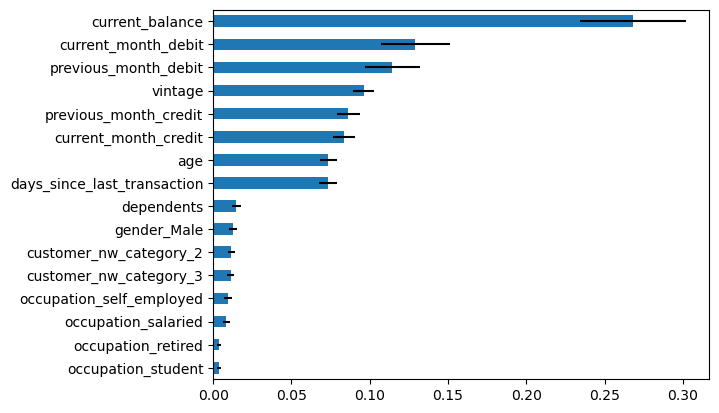

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual     0     1
     0 16115     0
     1     0  3724
Confusion Matrix (Accuracy 0.8490)

       Prediction
Actual    0    1
     0 6665  309
     1  975  554


In [512]:
# Traing a random forest model
rf = RandomForestClassifier(n_estimators=2000, random_state=1)
rf.fit(train_x,train_y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
df = pd.DataFrame({'feature': churn_data[predictors].columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)
# plotting a horizontal bar graph with feature importance values
ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.show()
#confusion matrix for validation set
classificationSummary(train_y, rf.predict(train_x))
classificationSummary(valid_y, rf.predict(valid_x))

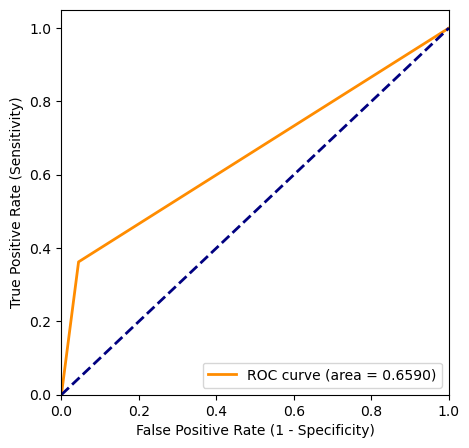

In [513]:
# compute ROC curve and AUC and building an roc curve chart
fpr, tpr, _ = roc_curve(valid_y, rf.predict(valid_x))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

In [514]:
## Logistic Regression

In [515]:
train_y_LR=train_y
valid_y_LR=valid_y

In [516]:
# fitting  a logistic regression model
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_x_LR, train_y_LR)


LogisticRegression(C=1e+42, solver='liblinear')

In [517]:
# printing intercepts and AIC score calculated by logistic regression model
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=train_x_LR.columns).transpose())
print('\nAIC', AIC_score(valid_y, logit_reg.predict(valid_x_LR), df = len(train_x_LR.columns) + 1))

intercept  -0.04430824464367403
        vintage      age  dependents  days_since_last_transaction  \
coeff -0.000187 -0.01412    0.014565                    -0.001861   

       current_balance  current_month_credit  previous_month_credit  \
coeff        -0.000037             -0.000013              -0.000007   

       current_month_debit  previous_month_debit  gender_Male  \
coeff             0.000021              0.000019    -0.012999   

       occupation_retired  occupation_salaried  occupation_self_employed  \
coeff            0.001365            -0.018087                 -0.000387   

       occupation_student  customer_nw_category_2  customer_nw_category_3  
coeff             -0.0271               -0.025145               -0.020959  

AIC 9537.960359134397


In [518]:
# training confusion matrix
classificationSummary(train_y_LR, logit_reg.predict(train_x_LR))
# validation confusion matrix
classificationSummary(valid_y_LR, logit_reg.predict(valid_x_LR))

Confusion Matrix (Accuracy 0.8128)

       Prediction
Actual     0     1
     0 16044    71
     1  3642    82
Confusion Matrix (Accuracy 0.8210)

       Prediction
Actual    0    1
     0 6952   22
     1 1500   29


In [519]:
# predictind outcomes for validation data
logit_reg_pred = logit_reg.predict(valid_x_LR)
logit_reg_proba = logit_reg.predict_proba(valid_x_LR)


In [520]:
# storing model results in a dataframe
logit_result = pd.DataFrame({'actual': valid_y_LR,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })

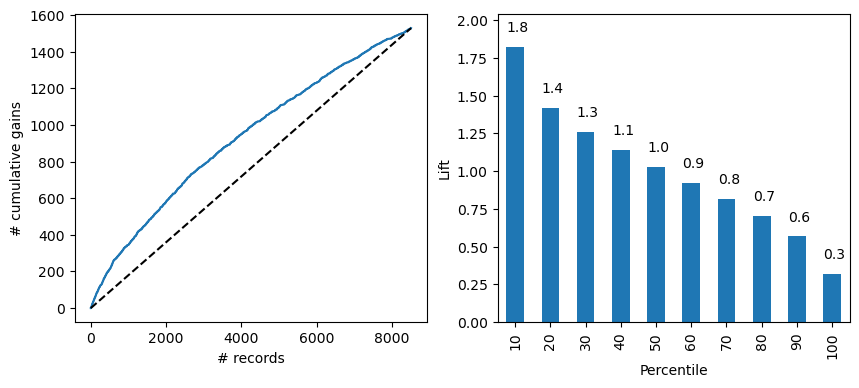

In [521]:
# creating gains and lift charts for logistic regression model
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

In [522]:
churn_data.head()

,vintage,age,dependents,days_since_last_transaction,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,churn,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,3135,66,0.0,224.0,1458.71,0.20,0.20,0.20,0.20,0,True,False,False,True,False,True,False
1,310,35,0.0,60.0,5390.37,0.56,0.56,5486.27,100.56,0,True,False,False,True,False,True,False
2,2356,31,0.0,0.0,3913.16,0.61,0.61,6046.73,259.23,0,True,False,True,False,False,True,False
3,478,90,0.0,147.0,2291.91,0.47,0.47,0.47,2143.33,1,False,False,False,True,False,True,False
4,2531,42,2.0,58.0,927.72,0.33,714.61,588.62,1538.06,1,True,False,False,True,False,False,True


In [523]:
churn_data.head()

,vintage,age,dependents,days_since_last_transaction,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,churn,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,3135,66,0.0,224.0,1458.71,0.20,0.20,0.20,0.20,0,True,False,False,True,False,True,False
1,310,35,0.0,60.0,5390.37,0.56,0.56,5486.27,100.56,0,True,False,False,True,False,True,False
2,2356,31,0.0,0.0,3913.16,0.61,0.61,6046.73,259.23,0,True,False,True,False,False,True,False
3,478,90,0.0,147.0,2291.91,0.47,0.47,0.47,2143.33,1,False,False,False,True,False,True,False
4,2531,42,2.0,58.0,927.72,0.33,714.61,588.62,1538.06,1,True,False,False,True,False,False,True


In [524]:
# Rescaling predictors 
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(train_x)
x_valid_scaled = scaler.transform(valid_x)

In [525]:
valid_x.head()

,vintage,age,dependents,days_since_last_transaction,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
677,2415,22,0.0,9.0,1885.06,26.63,0.49,0.49,0.49,True,False,False,False,True,False,True
28188,1560,50,0.0,0.0,27347.31,13220.24,3775.24,785.96,785.96,True,False,False,True,False,False,False
22242,2709,29,0.0,70.0,2051.98,0.20,0.20,0.20,0.20,False,False,False,False,True,True,False
8057,605,26,0.0,24.0,1127.54,500.66,686.37,6214.94,0.66,False,False,False,True,False,False,True
17416,1637,60,0.0,77.0,5639.91,0.20,0.20,0.20,0.20,False,False,False,True,False,False,True


In [526]:
# Training neural network on scaled training data 
model = MLPClassifier(hidden_layer_sizes=(7), max_iter=10000,activation='logistic', solver='lbfgs',
random_state=1)
model.fit(x_train_scaled, train_y)


MLPClassifier(activation='logistic', hidden_layer_sizes=7, max_iter=10000,
              random_state=1, solver='lbfgs')

In [527]:
print('Intercepts')
print(model.intercepts_)
print('Weights')
print(model.coefs_)

Intercepts
[array([ 25.66726988,  24.77571585, -34.75405651, -64.38225094,
        -1.3200959 ,   4.78548191,   2.84338581]), array([-180.94829604])]
Weights
[array([[-4.46038725e+01,  1.44720654e+01,  7.87545425e+00,
         2.29661005e+01,  1.68171242e+01, -4.69811167e-01,
         4.38418172e+01],
       [ 5.20711772e+00,  3.37206945e+01, -3.01904917e+00,
        -1.96515391e+01,  4.65702500e+00,  9.33614585e-02,
         6.88534628e+01],
       [ 6.78170984e+01,  1.84190283e+01, -1.11390665e+01,
        -1.72303605e+01, -6.15361578e+00, -1.54673884e-01,
         1.81629910e+01],
       [-5.47381432e+01, -5.19959676e+01, -4.81819092e+01,
        -1.32643209e+01, -6.23387819e+01, -3.94431558e-01,
         7.52670937e+01],
       [ 5.97735312e+01,  2.69910360e+01, -3.61263005e+01,
        -1.08408717e+01,  5.08422905e+01, -5.26710307e+01,
        -7.31895724e+00],
       [-2.91522030e+01, -1.25444314e+01,  2.48006170e+01,
         2.63495011e+00, -1.92961212e+00,  7.12433033e+01,
   

In [528]:
# New dataframe with actual and predicted outcome for test data
results_df=pd.concat([
valid_y,
pd.DataFrame((model.predict_proba(x_valid_scaled)))
], axis=1)

In [529]:
# Prediction
print(results_df)

       churn         0         1
677      0.0  0.791049  0.208951
28188    0.0       NaN       NaN
22242    0.0       NaN       NaN
8057     0.0  0.782724  0.217276
17416    1.0       NaN       NaN
...      ...       ...       ...
8494     NaN  0.582918  0.417082
8496     NaN  0.625658  0.374342
8500     NaN  0.871129  0.128871
8501     NaN  0.901891  0.098109
8502     NaN  0.628737  0.371263

[14399 rows x 3 columns]


In [530]:
# Checking for accuracy and building a confusion matrix
classificationSummary(valid_y, model.predict(x_valid_scaled))

Confusion Matrix (Accuracy 0.8163)

       Prediction
Actual    0    1
     0 6792  182
     1 1380  149


In [531]:
cm = confusion_matrix(valid_y, model.predict(x_valid_scaled))
cm

array([[6792,  182],
       [1380,  149]], dtype=int64)

In [532]:
df = pd.DataFrame(cm)

C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


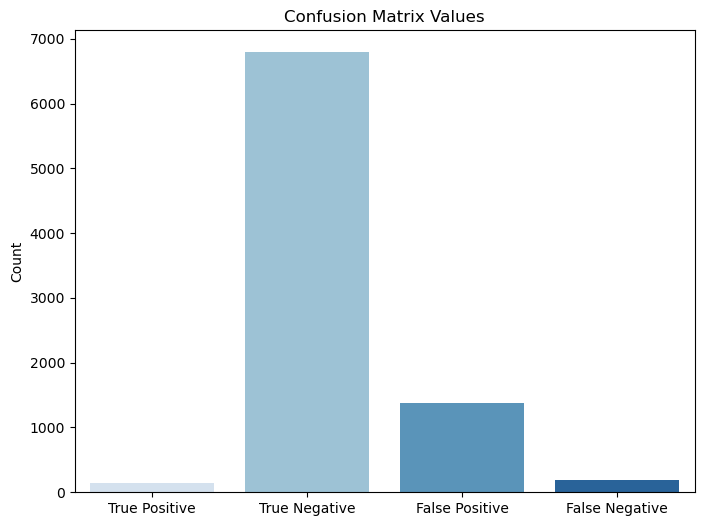

In [533]:
true_positive = df[1][ 1]
false_positive = df[0][ 1]
false_negative = df[1][0]
true_negative = df[0][ 0]

# Create a grouped bar plot
categories = ['True Positive', 'True Negative', 'False Positive', 'False Negative']
values = [true_positive, true_negative,false_positive, false_negative]

plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values, palette='Blues')
plt.title('Confusion Matrix Values')
plt.ylabel('Count')
plt.show()

In [534]:
# Defining parameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_error', # You can also use 'binary_logloss' or other appropriate metrics
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [535]:
# Creating LightGBM datasets
train_data = lgb.Dataset(x_train_scaled, label=train_y)
test_data = lgb.Dataset(x_valid_scaled, label=valid_y)

In [536]:
# Training the LightGBM model
num_round = 100
lightgbm_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])


In [537]:
# Making predictions
y_pred_proba = lightgbm_model.predict(x_valid_scaled, num_iteration=lightgbm_model.best_iteration)
y_pred = (y_pred_proba > 0.5).astype(int)


In [538]:
# Evaluating the model
accuracy = accuracy_score(valid_y, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(valid_y, y_pred))

Accuracy: 0.8455839115606256
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6974
           1       0.61      0.38      0.47      1529

    accuracy                           0.85      8503
   macro avg       0.74      0.66      0.69      8503
weighted avg       0.83      0.85      0.83      8503



In [539]:
# Building a confusion matrix to check results
cm = confusion_matrix(valid_y, y_pred)


In [540]:
# Confusion matrix
cm

array([[6609,  365],
       [ 948,  581]], dtype=int64)

In [541]:
# Defining class labels
class_names = ['Non-Churn', 'Churn']


C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


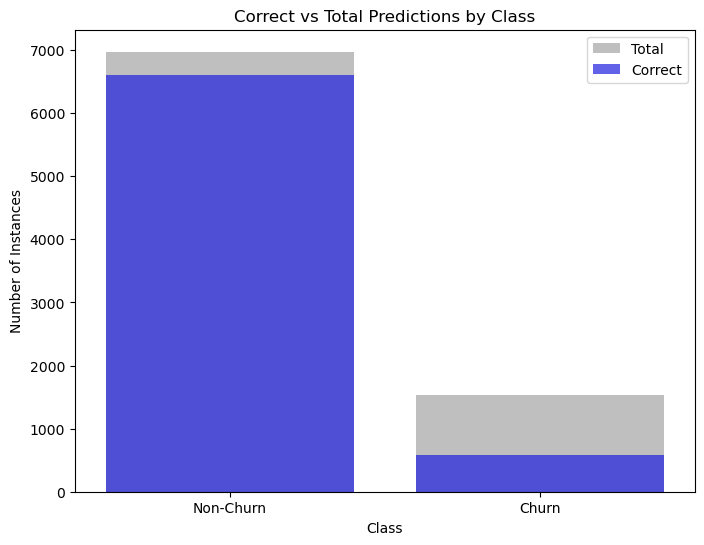

In [542]:
# Plotting a stacked column chart to visualize results
plt.figure(figsize=(8, 6))
sns.barplot(x=class_names, y=cm.sum(axis=1), color='gray', alpha=0.5, label='Total')
sns.barplot(x=class_names, y=cm.diagonal(), color='blue', alpha=0.7, label='Correct')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Correct vs Total Predictions by Class')
plt.legend()
plt.show()

In [543]:
# Strong results in a list
results = [['Random Forest',84.90],['Logistic Regression',82.10],['MLP Classifier',81.63],['Light GBM',84.55]]

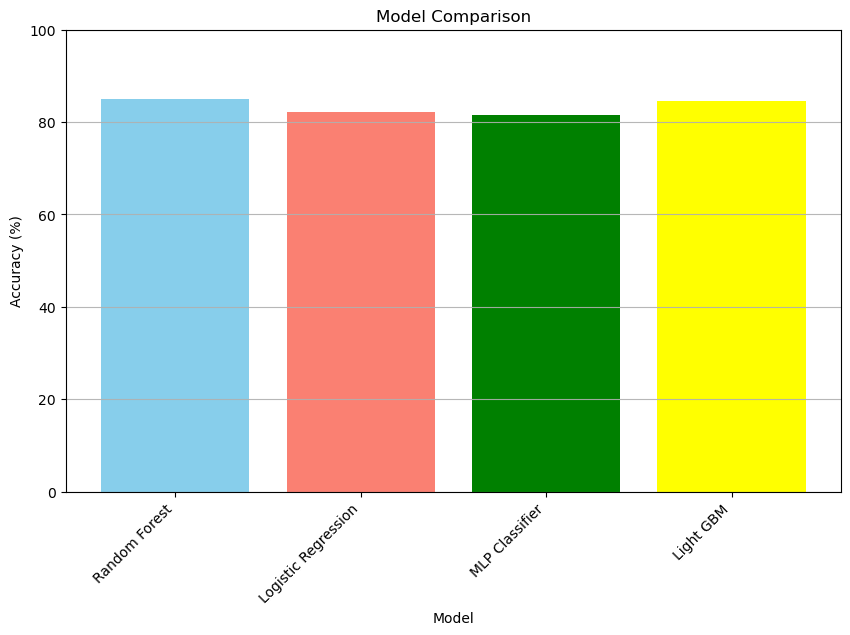

In [560]:
# Extracting model name and results from results list
models = [result[0] for result in results]
accuracies = [result[1] for result in results]
colors = ['skyblue', 'salmon', 'green', 'yellow']

# Results bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='-', alpha=0.9)
plt.xticks(rotation=45, ha='right')
plt.show()